In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import modules and utilities

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/media-agenda'
%pwd

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util import Source

%cd '/content/drive/My Drive/Colab Notebooks/media-agenda/plot'
%pwd

/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/plot


'/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/plot'

## Load the newly generated sentence-cluster-sentiment assignment dictionary

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/media-agenda/data/sentence_cluster_sentiment_dict.json'

with open(path, 'r') as f:
  assignments = json.load(f)

# Convert assignments into panda dataframe
df = pd.DataFrame.from_dict(assignments)
df.head()

,sentence_id,source,article_id,comment_id,posting_time,cluster,sentiw_sentiment,textblob_polarity,textblob_subjectivity
0,0,nytimes,0,-1,2005-11-01 00:00:00,1,0.12500,-0.017045,0.518182
1,1,nytimes,0,-1,2005-11-01 00:00:00,1,-0.12500,0.337500,0.675000
2,2,nytimes,0,-1,2005-11-01 00:00:00,3,0.07500,0.085714,0.192857
3,3,nytimes,0,-1,2005-11-01 00:00:00,1,0.50000,0.025000,0.250000
4,4,nytimes,0,-1,2005-11-01 00:00:00,1,-0.03125,-0.050000,0.291667


## Plot the distribution of sentiment for different sentiment analysis modules and sources

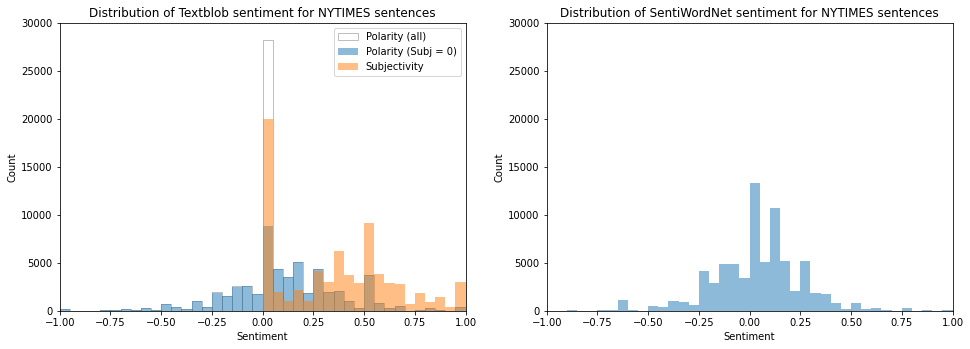

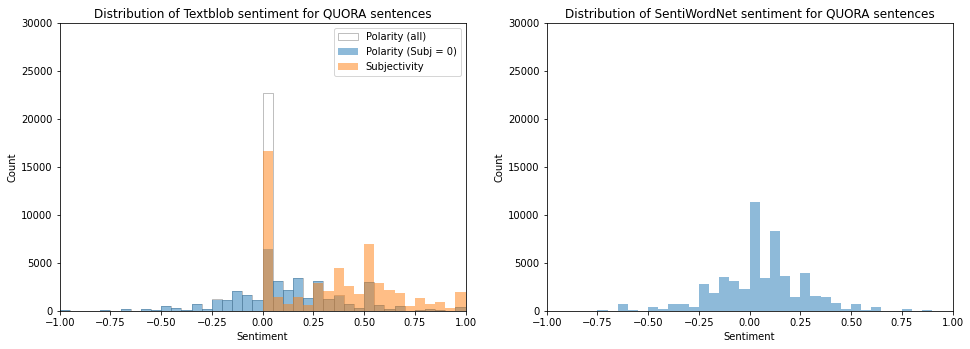

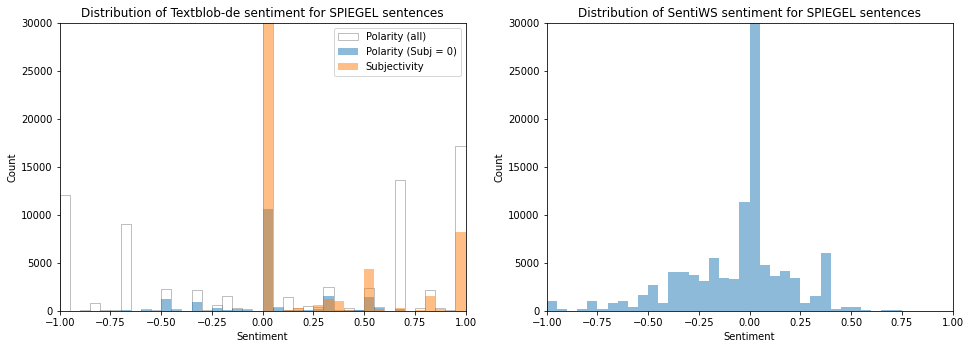

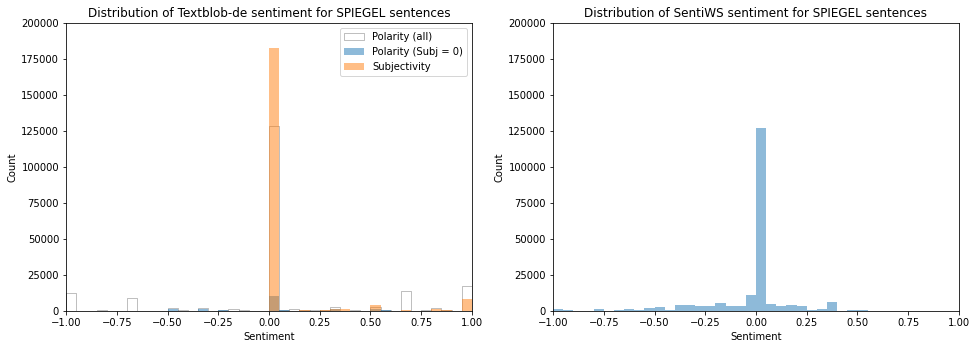

In [ ]:
def plot(source = Source, ylim = (0, 30000), fname = None):
  if source == Source.SPIEGEL:
    textblob = 'Textblob-de'
    senti = 'SentiWS'
  else:
    textblob = 'Textblob'
    senti = 'SentiWordNet'

  fig = plt.figure(figsize=(16, 8))

  ax = plt.subplot(121)

  plt.hist(df[(df.source == source)].textblob_polarity, color = 'white', alpha = 0.5, bins = 40, range = (-1, 1), label = 'Polarity (all)', edgecolor = 'black', linewidth = 0.5)
  plt.hist(df[(df.source == source) & (df.textblob_subjectivity != 0)].textblob_polarity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Polarity (Subj = 0)')
  plt.hist(df[df.source == source].textblob_subjectivity, alpha = 0.5, bins = 40, range = (-1, 1), label = 'Subjectivity')
  plt.xlim(-1, 1)
  plt.ylim(ylim)
  plt.title('Distribution of {} sentiment for {} sentences'.format(textblob, str.upper(source)))
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.legend()

  plt.subplot(122)

  plt.hist(df[df.source == source].sentiw_sentiment, alpha = 0.5, bins = 40, range = (-1, 1))
  plt.xlim(-1, 1)
  plt.ylim(ylim)
  plt.title('Distribution of {} sentiment for {} sentences'.format(senti, str.upper(source)))
  plt.xlabel('Sentiment')
  plt.ylabel('Count')

  plt.subplots_adjust(bottom=0.25, top=0.75)
  plt.show()
  fig.savefig(fname, format = 'pdf')

plot(Source.NYTIMES, ylim = (0, 30000), fname = 'sentiment_dist_nytimes_sm.pdf')
plot(Source.QUORA, ylim = (0, 30000), fname = 'sentiment_dist_quora_sm.pdf')
plot(Source.SPIEGEL, ylim = (0, 30000), fname = 'sentiment_dist_spiegel_sm.pdf')
plot(Source.SPIEGEL, ylim = (0, 200000), fname = 'sentiment_dist_spiegel_lg.pdf')

